# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Which was the most improved SAT subject from the year 2017 - 2018?

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [4]:
# Loading the Data from the source i.e. csv
# ---
# Dataset 1 url = http://bit.ly/SAT2017Dataset
# Dataset 2 url = http://bit.ly/SAT2018Dataset
# ---
#

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

df1 = pd.read_csv("http://bit.ly/SAT2017Dataset")
df2 = pd.read_csv("http://bit.ly/SAT2018Dataset")

## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
#

df1.shape[0]
df2.shape[0]


51

In [8]:
# Previewing the top of our dataset
#

df2.head(5)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [9]:
# Previewing the bottom of our dataset
# 
df1.tail(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [11]:
# Checking whether each column has an appropriate datatype
#
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  5

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

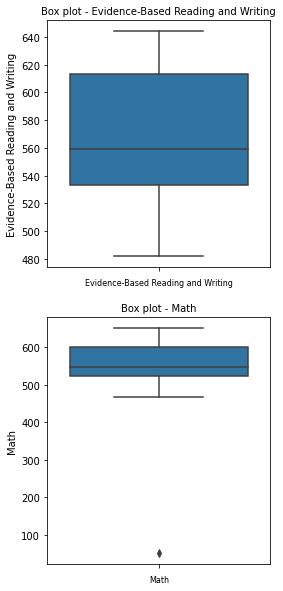

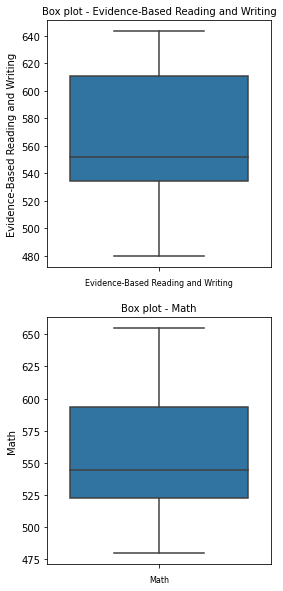

In [16]:
# Checking for Outliers
#
col_names = ['Evidence-Based Reading and Writing', 'Math']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df1[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)


plt.show()

col_names = ['Evidence-Based Reading and Writing', 'Math']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df2[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)


In [17]:
# Checking for Anomalies
#

def remove(data, col):
    col_upper = data[col].mean() + 3*data[col].std()
    col_lower = data[col].mean() - 3*data[col].std()
    df = data[(data[col]< col_upper) & (data[col]> col_lower)]
    return df 

# remove()

for c in col_names:

    newdf = remove(df1, c)
    
newdf

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [20]:
# Identifying the Missing Data
#
def miss(data):
    return data.isnull().sum()

miss(df1), miss(df2)


(State                                 0
 Participation                         0
 Evidence-Based Reading and Writing    0
 Math                                  0
 Total                                 0
 dtype: int64,
 State                                 0
 Participation                         0
 Evidence-Based Reading and Writing    0
 Math                                  0
 Total                                 0
 dtype: int64)

In [ ]:
# Dealing with the Missing Data
#

In [21]:
# More data cleaning procedures
#

def duplicates(data):
    return data.duplicated().sum()

duplicates(df1), duplicates(df2)

(0, 0)

In [30]:
#merging Dataframes



merged_data = df1.merge(df2, how="left", on='State')
merged_data.head(5)

,State,Participation_x,Evidence-Based Reading and Writing_x,Math_x,Total_x,Participation_y,Evidence-Based Reading and Writing_y,Math_y,Total_y
0,Alabama,5%,593,572,1165,6%,595,571,1166
1,Alaska,38%,547,533,1080,43%,562,544,1106
2,Arizona,30%,563,553,1116,29%,577,572,1149
3,Arkansas,3%,614,594,1208,5%,592,576,1169
4,California,53%,531,524,1055,60%,540,536,1076


## 6. Exploratory Analysis

In [35]:
# Ploting the univariate summaries and recording our observations
#

mean_subject = merged_data[['Evidence-Based Reading and Writing_x', 'Math_x', 'Evidence-Based Reading and Writing_y', 'Math_y']].mean()
mean_subject

rangeq = (merged_data['Math_y'].mean() - merged_data['Math_x'].mean()), (merged_data['Evidence-Based Reading and Writing_x'].mean() - merged_data['Evidence-Based Reading and Writing_y'].mean())




## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?